In [1]:
%matplotlib inline
import pandas as pd
import scipy as sp
from scipy import stats
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

### load data

In [2]:
df = pd.read_excel("data.xlsx")

In [3]:
# display the data
df.head()

,群名,群类别,群人数,消息数,稠密度,性别比,平均年龄,年龄差,地域集中度,手机比例,会话数,无回应比例,夜聊比例,图片比例
0,**手酒吧,1,63,315,0.051715,0.882353,26.681818,6.409413,0.222222,0.088889,23,0.434783,0.085714,0.069841
1,**秀嘉园,1,73,2,0.010274,0.579710,27.500000,9.042524,0.406780,0.000000,2,1.000000,1.000000,0.000000
2,**ˇ⒊無黒\噵丶⒈群,1,73,4,0.024163,0.750000,23.415385,4.699893,0.287879,0.500000,4,1.000000,0.000000,0.250000
3,**海网管工作联系基地,1,91,14,0.006105,0.901639,29.409091,2.854965,0.340426,0.142857,7,1.000000,0.250000,0.000000
4,tbsgame.net/bbs,1,133,2112,0.011107,0.961832,30.319672,4.669866,0.110236,0.167140,327,0.532110,0.104640,0.037879


In [4]:
category = df[u"群类别"]

In [5]:
avg_age = df[u"平均年龄"]

In [6]:
avg_age_arr = avg_age.as_matrix()

In [7]:
avg_age_arr.size

2040

In [8]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = "category~avg_age"
lm = ols(formula, df).fit()
anova_results = anova_lm(lm)
print anova_results

              df       sum_sq     mean_sq           F        PR(>F)
avg_age      1.0   355.608747  355.608747  152.381928  8.177305e-34
Residual  2038.0  4756.014292    2.333667         NaN           NaN


In [9]:
df.rename(columns={u'群类别':'category', u'平均年龄':'avg_age'}, inplace = True)

In [10]:
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:               category   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     152.4
Date:                Thu, 16 Nov 2017   Prob (F-statistic):           8.18e-34
Time:                        22:12:33   Log-Likelihood:                -3758.0
No. Observations:                2040   AIC:                             7520.
Df Residuals:                    2038   BIC:                             7531.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9295      0.188      4.951      0.0

### 3. a)  
Draw the **empirical probability density function** of Col[7], i.e. the empirical pdf of average age. 

Does the data in this dimension follow Gaussian distribution? 

Test normality of Col[7]. 

In [62]:
def plot_pdf(data, xlabel,name):
    # Kernel density estimation is a way to 
    # estimate the probability density function (PDF) of 
    # a random variable in a non-parametric way.
    kde = stats.gaussian_kde(data)
    # generate 1000 points distributed equally in [0, max]
    x = np.linspace(data.min()/3, data.max(), 1000)
    mean = data.mean()
    var = data.var()
    normpdf = 1/np.sqrt(2*np.pi*var) * np.exp( -(x-mean)*(x-mean)  /2 /var)
    pdf=kde.pdf(x)
    k2,p = stats.normaltest(data)
    alpha = 1e-3
    is_rejected = "rejected" if p < alpha else "not rejected"
    plt.figure()
    plt.title("%s pdf   \n p-value=%f  %s"% (name,p,is_rejected))
    plt.xlabel(xlabel)
    plt.ylabel("pdf")
    plt.plot(x,pdf,'r',label="estimate pdf")
    plt.plot(x,normpdf,'b',label="gaussian pdf")
    plt.legend(loc='upper left')
    plt.savefig("pic1/"+name+".png",dpi=100)	

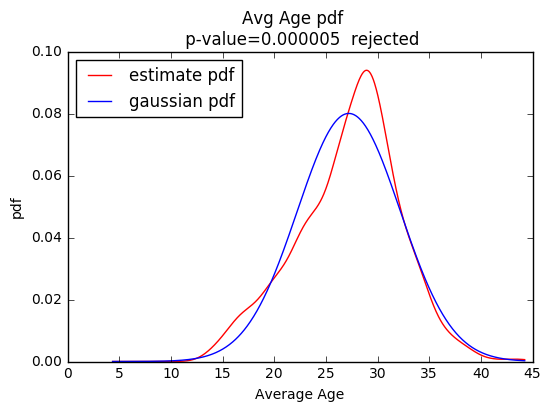

In [58]:
plot_pdf(avg_age_arr,"Average Age","Avg Age")

In [13]:
def test_normality(data):
    # Test whether a sample differs from a normal distribution.
    # tests the null hypothesis that a sample comes from a normal distribution.
    k2,p = stats.normaltest(data)
    # significance level 0.001
    alpha = 1e-3
    # p-value
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

In [14]:
test_normality(avg_age_arr)

p = 4.8348e-06
The null hypothesis can be rejected


### 3. b) 
In Col[7], there are 5 components divided by category labels. 

We denote the data in Col[7] with category i (where i = 1,…,5) as Col[7|categoty=i]. 

**Test the normality of each components** and **test the homogeneity of variances**.

In [15]:
df = pd.read_excel('data.xlsx')
group = [df[df[u'群类别'] == i][u'平均年龄'].as_matrix() for i in range(1,6)]

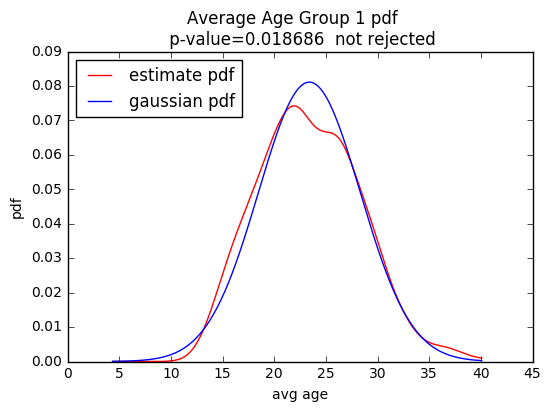

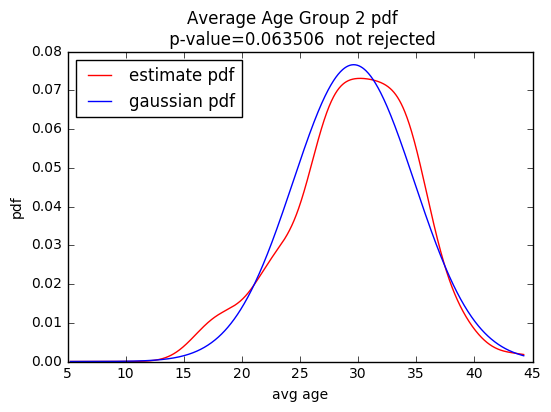

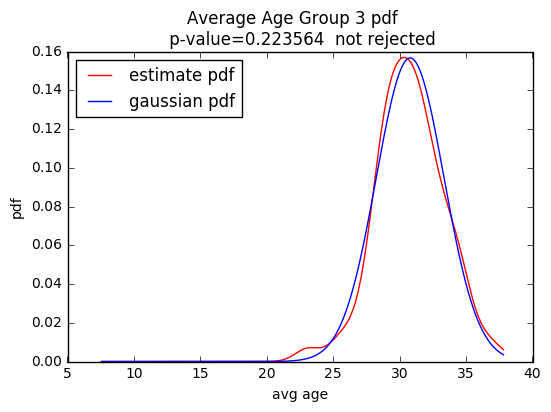

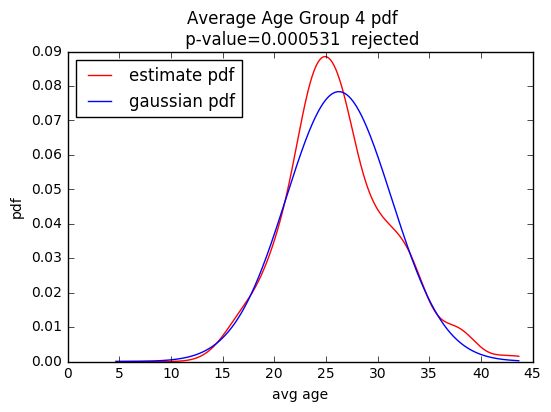

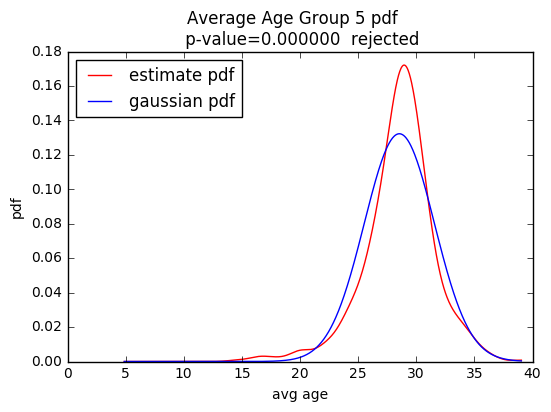

In [16]:
for i,groupi in enumerate(group):
    plot_pdf(groupi,"avg age","Average Age Group %d" % (i+1))

In [17]:
std = []
for i,groupi in enumerate(group):
    std.append(groupi.std())
std_arr = np.array(std)
print "ratio of largest to smallest group std. dev.: ",std_arr.max()/std_arr.min()

ratio of largest to smallest group std. dev.:  2.04551837158


In [18]:
#首先进行levene test，如果p小于0.05，就警告方差不齐
#levene方差齐性检验。levene(*args, **kwds)  Perform Levene test for equal variances.如果p<0.05，则方差不齐
w,p = stats.levene(*group)
if p < 0.05:
    print u'警告：levene test显示方差齐性假设不成立（p=%.2f）' % p

警告：levene test显示方差齐性假设不成立（p=0.00）


In [19]:
print w,p

61.0192797709 9.6773553338e-49


In [66]:
for i in range(0,5):
    test_normality(group[i])

p = 0.0186862
The null hypothesis cannot be rejected
p = 0.0635065
The null hypothesis cannot be rejected
p = 0.223564
The null hypothesis cannot be rejected
p = 0.000531072
The null hypothesis can be rejected
p = 2.22673e-20
The null hypothesis can be rejected


### 3. c)
Do the **one-way ANOVA test** for Col[7] with categories in Col[2]. 

Write down your conclusion, supporting statistics, and 

**visualize your data** which inspire the process.

In [20]:
f,p = stats.f_oneway(*group)
print f,p

171.507032707 1.08209160648e-126


In [21]:
def visualize(data_total,data_group, name):
    colors = 'bgrmy'
    f = plt.figure()
    plt.xlabel(name)
    for i,data in enumerate(data_group):
        x = np.linspace(data.min()/3, data.max(), 1000)
        mean = data.mean()
        var = data.var()
        std = data.std()
        kde = stats.gaussian_kde(data)
        pdf = kde.pdf(x)
        plt.plot(x, pdf, colors[i], label="Group %d" %(i+1) )
    plt.legend(loc="upper left")
    
    plt.figure()
    grand_mean = data_total.mean()
    plt.boxplot(data_group, showmeans=True, meanline=True)
    plt.axhline(y=grand_mean, label="Grand Mean")
    plt.xlabel("Group")
    plt.ylabel(name)
    plt.legend()

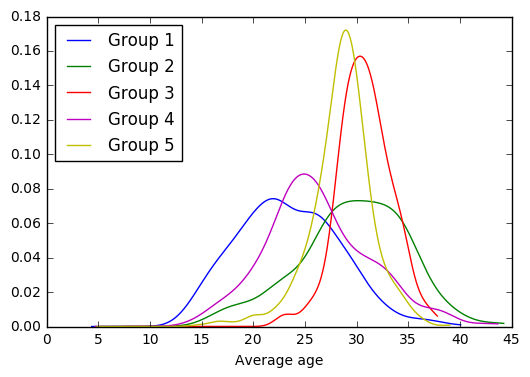

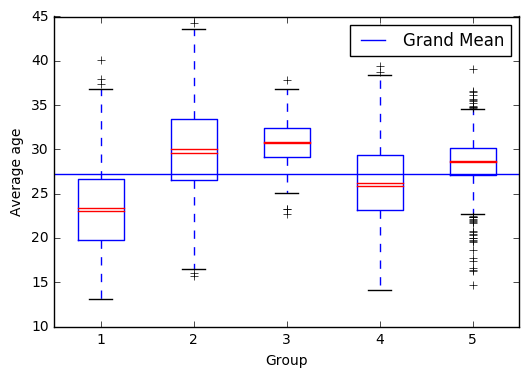

In [22]:
visualize(avg_age_arr,group,"Average age")

### 4. 
Choose another 3 columns

**draw the empirical pdf** of each feature columns 

**test** which column follows these **assumptions in question 1**? 

How about their corresponding **log transformation**?

**draw the empirical pdf of each feature columns**

In [23]:
# choose group size，message number，sex ration 
cols_name = [u"群人数",u"消息数",u"年龄差"]
cols_name_e = ["group size","msg num","variance of age"]
cols_arr = [df[col].as_matrix() for col in cols_name]

In [69]:
group_size = cols_arr[0]
msg_num = cols_arr[1]
variance_age = cols_arr[2]

In [72]:
test_normality(variance_age)

p = 0.331845
The null hypothesis cannot be rejected


p = 0
The null hypothesis can be rejected
None
p = 0
The null hypothesis can be rejected
None
p = 0.331845
The null hypothesis cannot be rejected
None


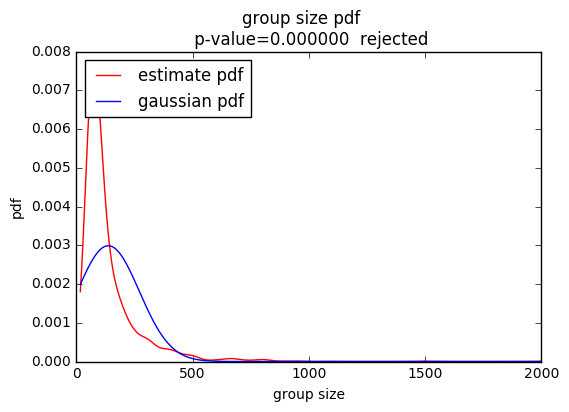

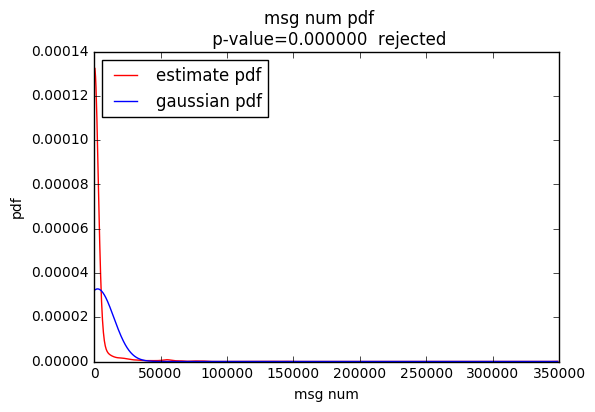

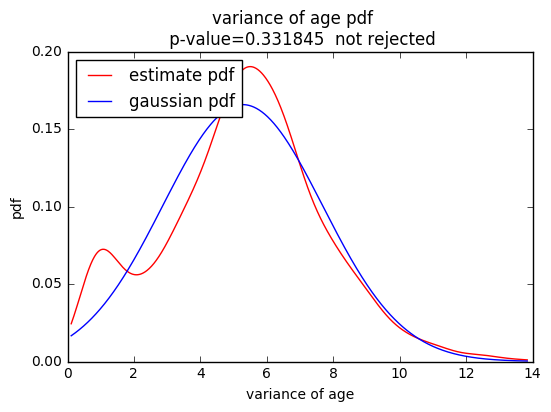

In [67]:
for xlabel,col in zip(cols_name_e,cols_arr):
    print test_normality(col)
    plot_pdf(col,xlabel,xlabel)

In [26]:
group_size_group = [df[df[u'群类别'] == i][u'群人数'].as_matrix() for i in range(1,6)]
msg_num_group = [df[df[u'群类别'] == i][u'消息数'].as_matrix() for i in range(1,6)]
variance_age_group = [df[df[u'群类别'] == i][u'年龄差'].as_matrix() for i in range(1,6)]

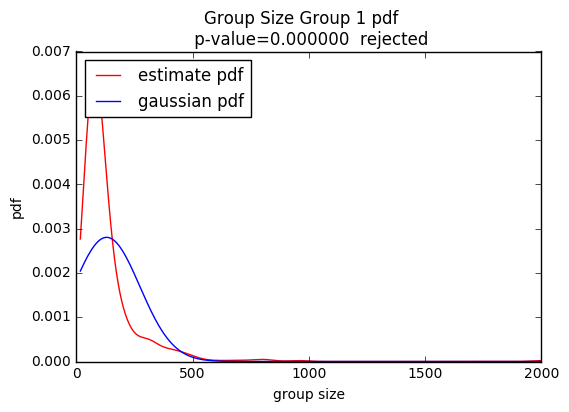

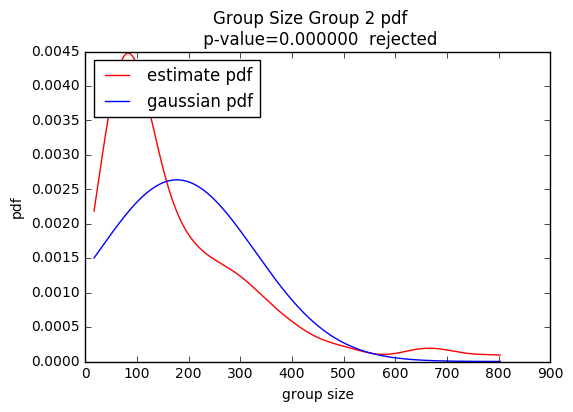

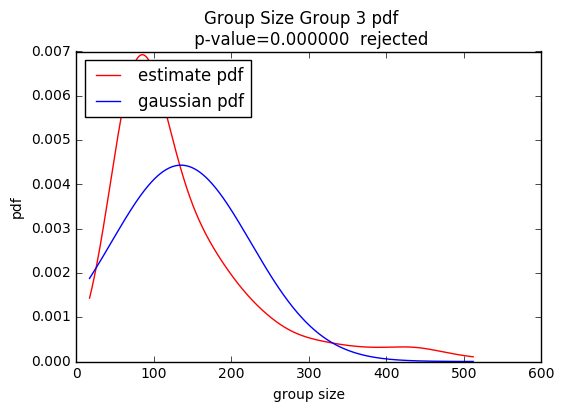

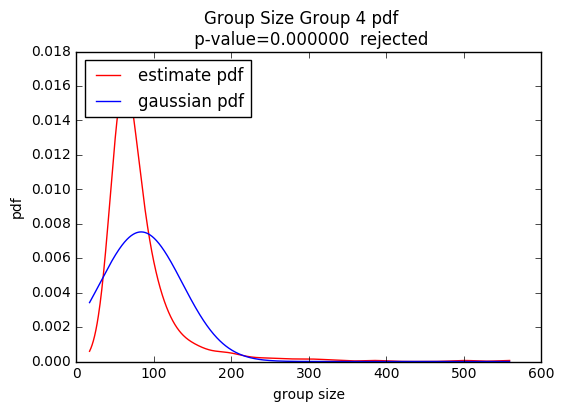

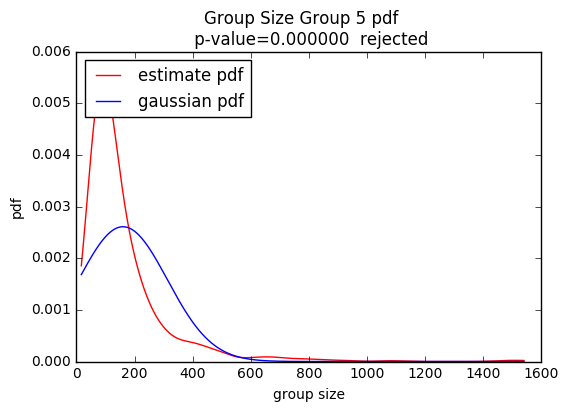

In [27]:
for i,groupi in enumerate(group_size_group):
    plot_pdf(groupi,"group size","Group Size Group %d" % (i+1))

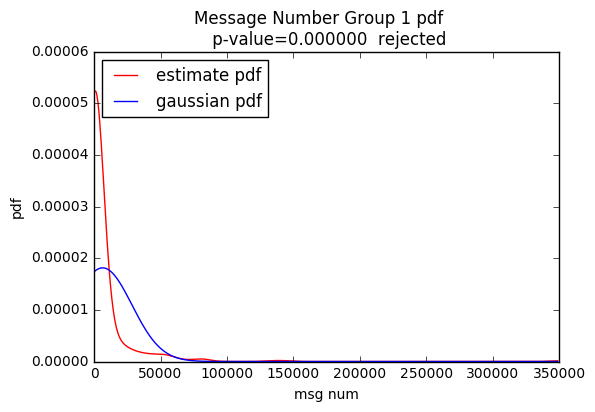

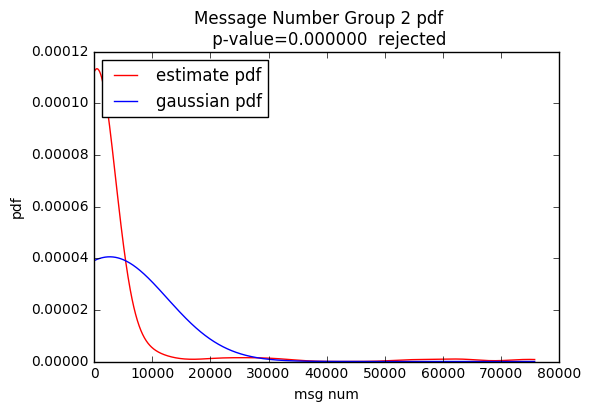

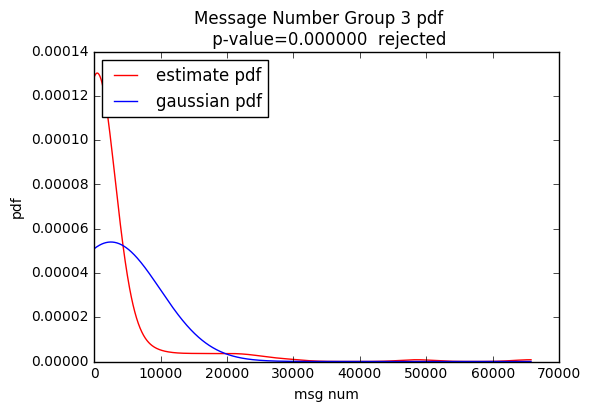

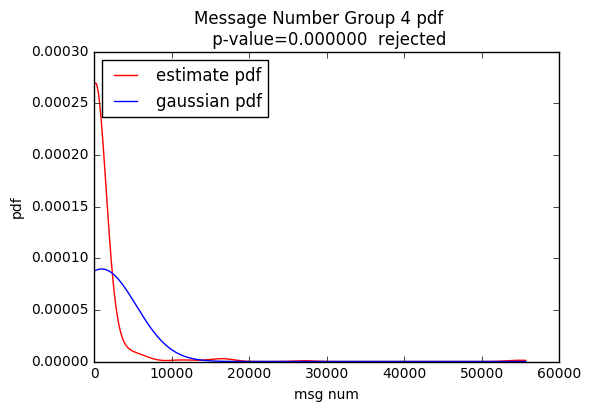

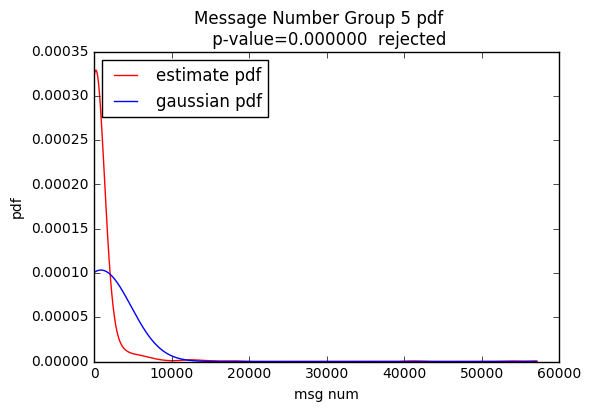

In [28]:
for i,groupi in enumerate(msg_num_group):
    plot_pdf(groupi,"msg num","Message Number Group %d" % (i+1))

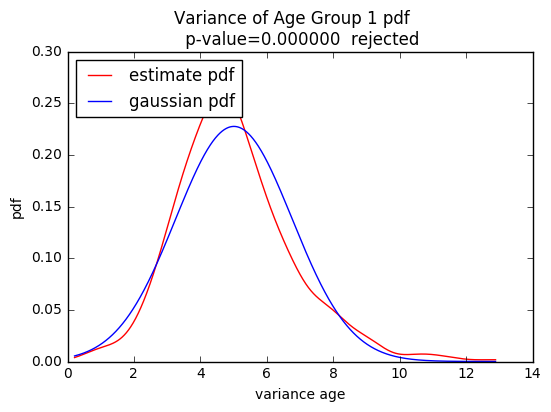

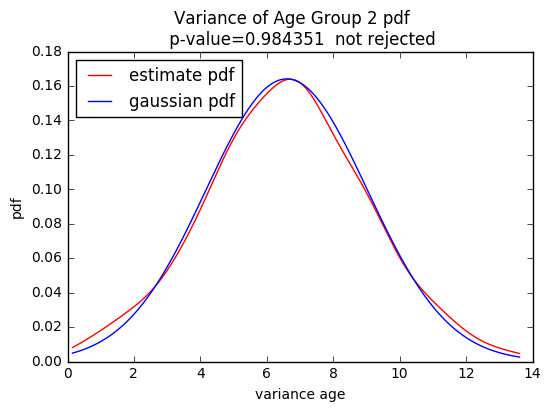

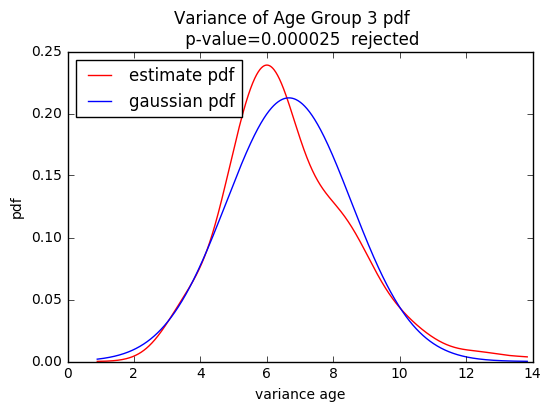

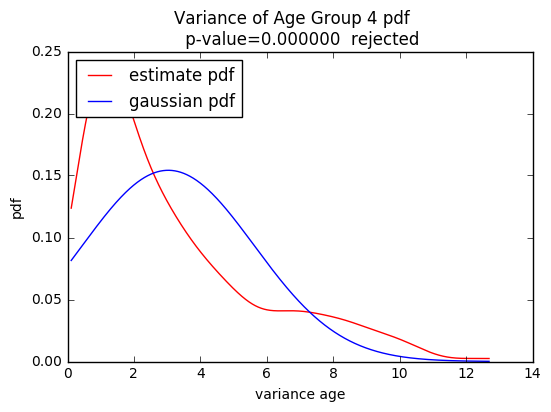

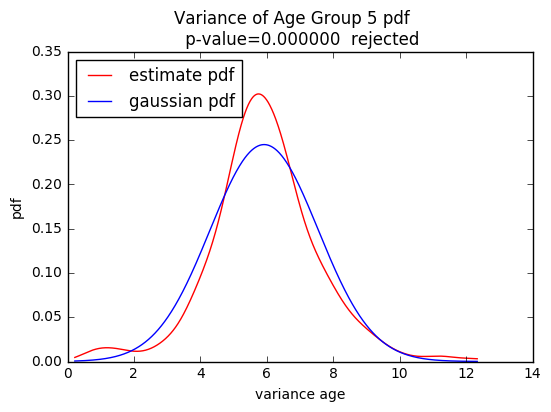

In [29]:
for i,groupi in enumerate(variance_age_group):
    plot_pdf(groupi,"variance age","Variance of Age Group %d" % (i+1))

#### test assumptions
- Data are randomly sampled. Data samples are indenpent from each other
- The variances of each group are assumed as equal. Empirically, ratio of largest to smallest group standard deviation must be less than 2:1.
- The residuals are normally distributed (not skewed or partial)

In [30]:
group_size = [df[df[u'群类别'] == i][u'群人数'].as_matrix() for i in range(1,6)]
msg_num = [df[df[u'群类别'] == i][u'消息数'].as_matrix() for i in range(1,6)]
variance_age = [df[df[u'群类别'] == i][u'年龄差'].as_matrix() for i in range(1,6)]

In [31]:
for ind,data in enumerate([group_size,msg_num,variance_age]):
    std = [np.std(group_size[i]) for i in range(0,5)]
    std_arr = np.array(std,dtype=float)
    if std_arr.max() / std_arr.min() > 2:
        print "In ",cols_name_e[ind]," the variances of each group are not equal, i.e, not homoscedastic"

In  group size  the variances of each group are not equal, i.e, not homoscedastic
In  msg num  the variances of each group are not equal, i.e, not homoscedastic
In  variance of age  the variances of each group are not equal, i.e, not homoscedastic


In [32]:
def skew_test(data):
    #偏度（skewness）描述的是概率分布的偏斜（非对称）程度。
    #偏度检验有两个返回值，其中第二个返回值为p-value，即观察到的数据集服从正态分布的概率，取值范围为0~1。
    #该数据集有p-value的概率服从正态分布。
    print "Skewtest", "pvalue", stats.skewtest(data) 

In [33]:
# group size
skew_test(cols_arr[0])

# msg num
skew_test(cols_arr[1])

# variance of age
skew_test(cols_arr[2])

Skewtest pvalue SkewtestResult(statistic=36.433162486099576, pvalue=1.2712362807765213e-290)
Skewtest pvalue SkewtestResult(statistic=54.260089202222915, pvalue=0.0)
Skewtest pvalue SkewtestResult(statistic=1.4750544033746911, pvalue=0.14019791769383663)


In [34]:
print "==== group size ===="
for i in range(0,5):
    print "Group ",i+1
    skew_test(group_size[i])
print 
print "==== msg num ===="
for i in range(0,5):
    print "Group ",i+1
    skew_test(msg_num[i])
print 
print "==== variance of age ===="
for i in range(0,5):
    print "Group ",i+1
    skew_test(variance_age[i])

==== group size ====
Group  1
Skewtest pvalue SkewtestResult(statistic=20.725659244796365, pvalue=2.0332384157053061e-95)
Group  2
Skewtest pvalue SkewtestResult(statistic=9.4460166806438561, pvalue=3.519706023202993e-21)
Group  3
Skewtest pvalue SkewtestResult(statistic=7.8299880936685557, pvalue=4.8791617124345035e-15)
Group  4
Skewtest pvalue SkewtestResult(statistic=17.098965285980125, pvalue=1.5106247523940926e-65)
Group  5
Skewtest pvalue SkewtestResult(statistic=19.599868718387082, pvalue=1.5502332518937273e-85)

==== msg num ====
Group  1
Skewtest pvalue SkewtestResult(statistic=23.693440958712561, pvalue=4.213173761401034e-124)
Group  2
Skewtest pvalue SkewtestResult(statistic=15.779914311375887, pvalue=4.2776838374657683e-56)
Group  3
Skewtest pvalue SkewtestResult(statistic=12.843271617365831, pvalue=9.3824037092864526e-38)
Group  4
Skewtest pvalue SkewtestResult(statistic=22.322689966626722, pvalue=2.2249283480039378e-110)
Group  5
Skewtest pvalue SkewtestResult(statistic=2

#### log transformation

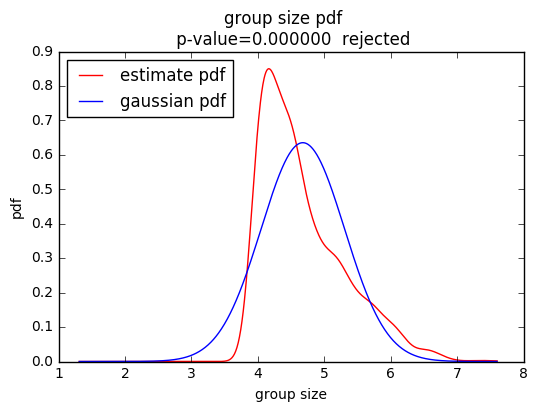

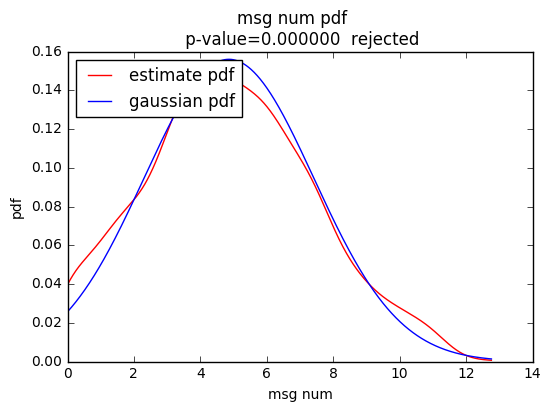

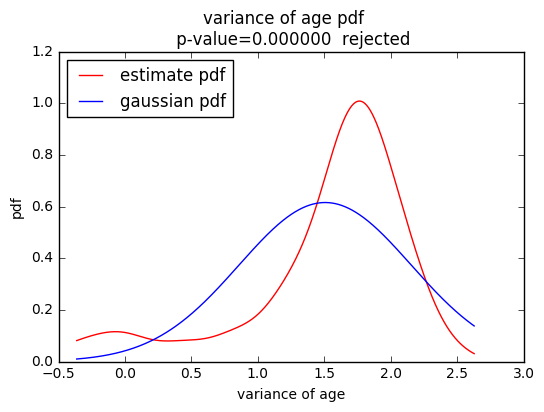

In [35]:
for xlabel,col in zip(cols_name_e,cols_arr):
    plot_pdf(np.log(col),xlabel,xlabel)

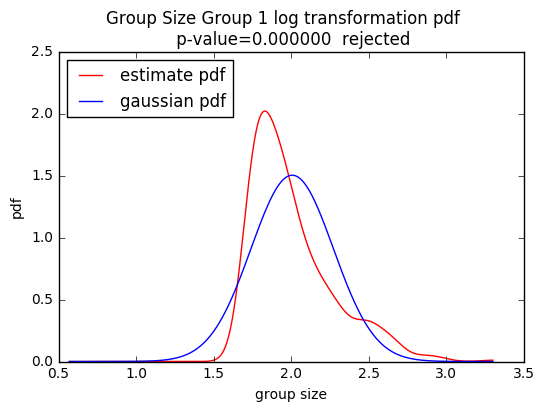

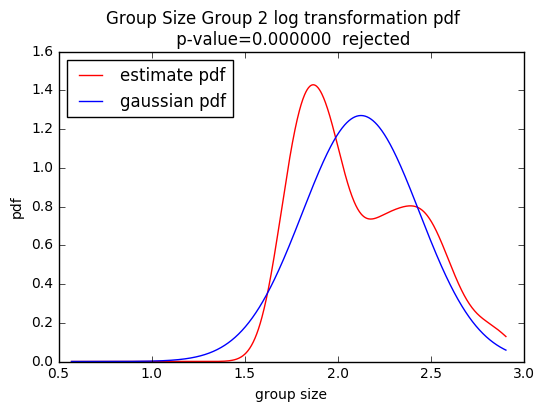

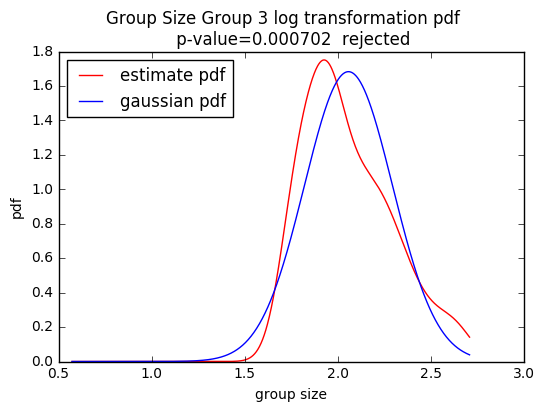

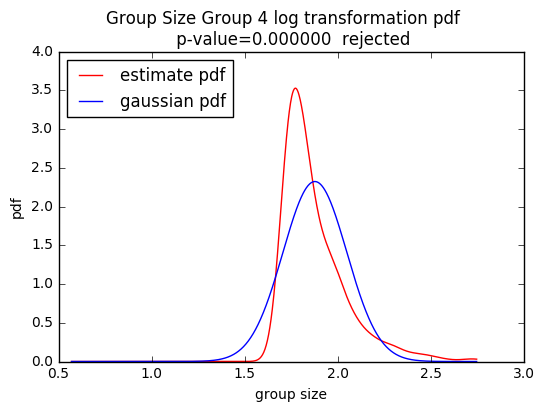

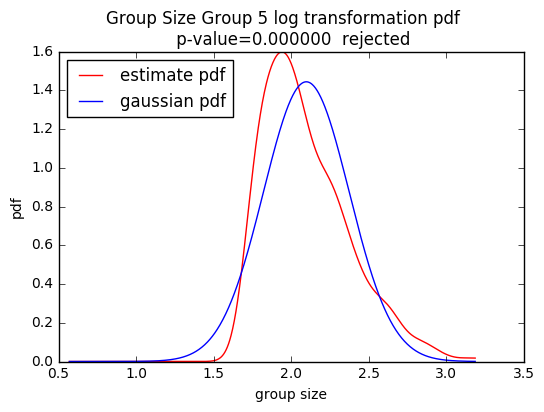

In [63]:
for i,groupi in enumerate(group_size_group):
    plot_pdf(np.log10(groupi),"group size","Group Size Group %d log transformation" % (i+1))

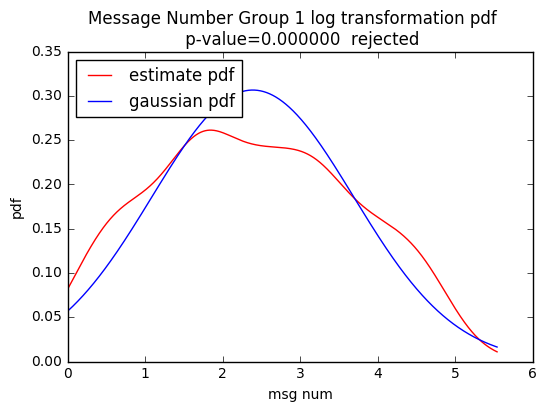

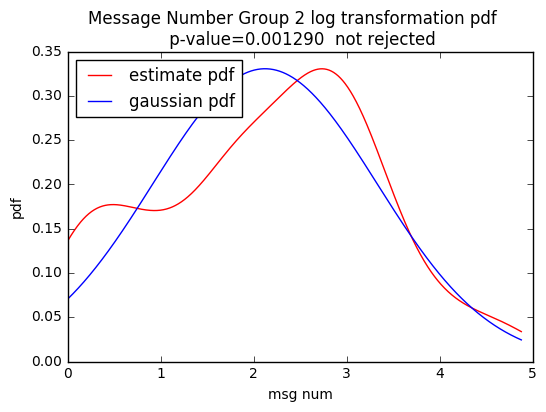

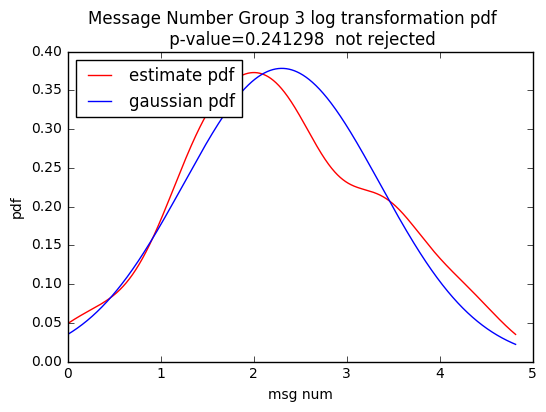

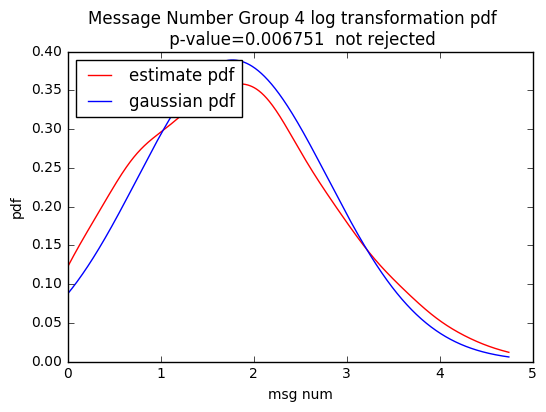

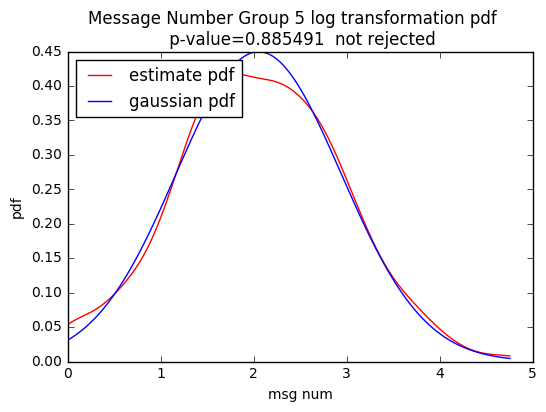

In [64]:
for i,groupi in enumerate(msg_num_group):
    plot_pdf(np.log10(groupi),"msg num","Message Number Group %d log transformation" % (i+1))

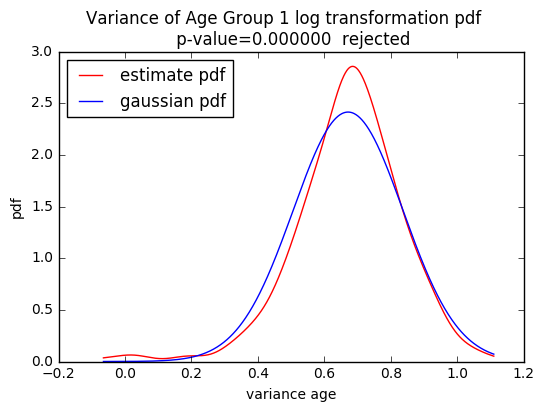

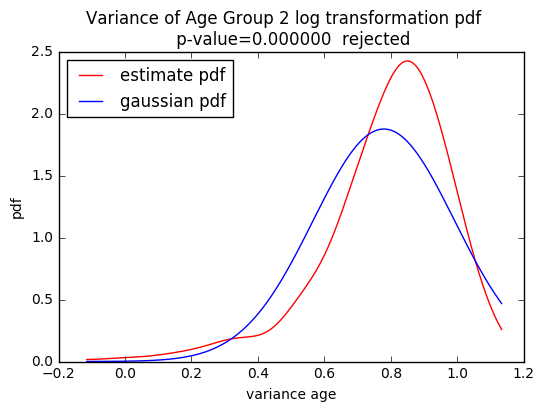

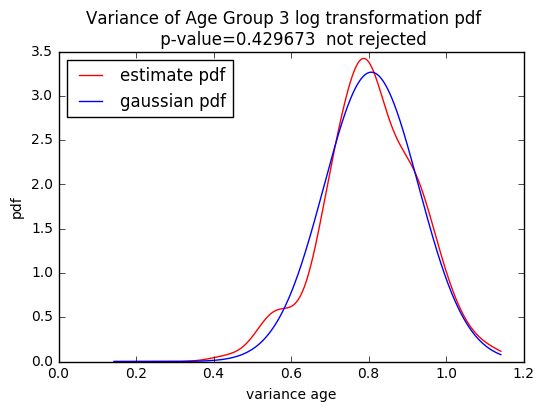

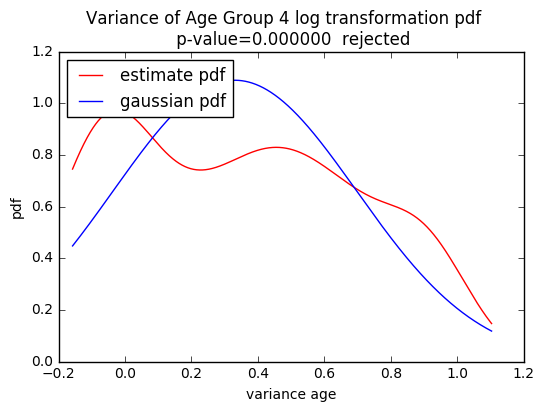

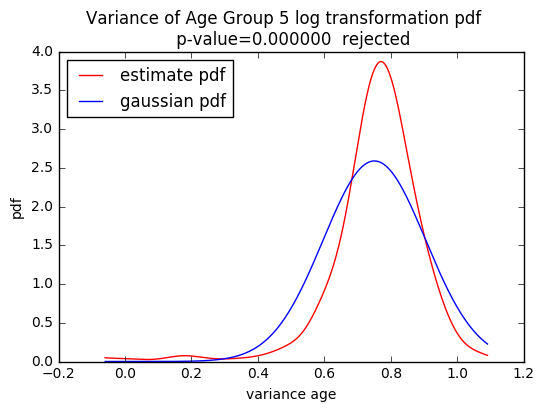

In [65]:
for i,groupi in enumerate(variance_age_group):
    plot_pdf(np.log10(groupi),"variance age","Variance of Age Group %d log transformation" % (i+1))

### 5. How to do one-way ANOVA with the non-normal data?
a) Find and list the **possible solutions set**.

### 5. How to do one-way ANOVA with the non-normal data?
b) Do the **one-way ANOVA** on the 3 columns you choose. 

Do these feature columns vary significantly? 

Visualize the results.

In [39]:
# group size
print  stats.f_oneway(*group_size)

# msg num
print stats.f_oneway(*msg_num)

# variance of age
print stats.f_oneway(*variance_age)

F_onewayResult(statistic=30.701083202808537, pvalue=7.5368647703444508e-25)
F_onewayResult(statistic=17.383946395146189, pvalue=4.9210359078640204e-14)
F_onewayResult(statistic=200.24221601479533, pvalue=6.3170461722256334e-145)


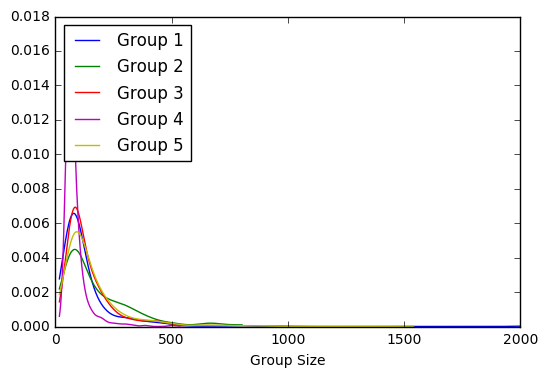

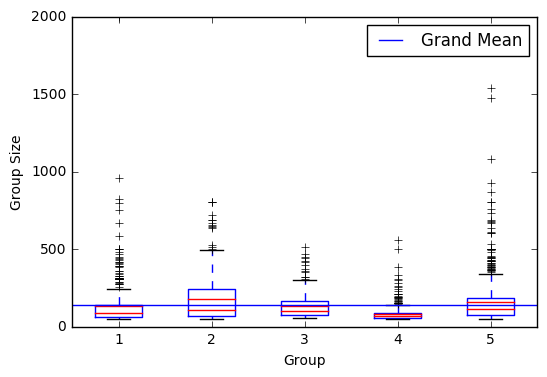

In [40]:
visualize(cols_arr[0],group_size,"Group Size")

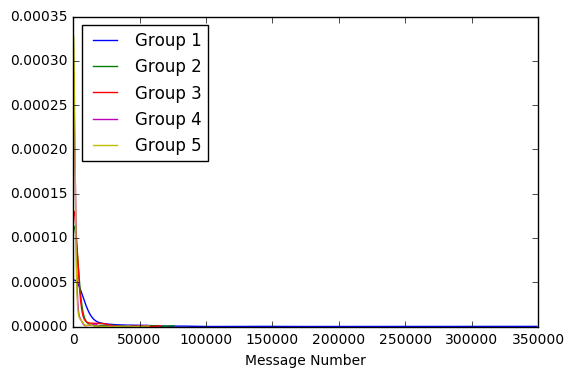

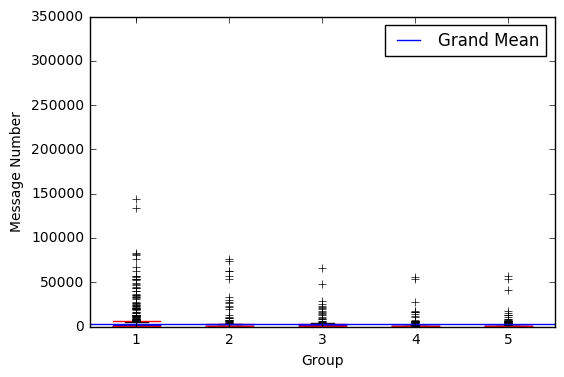

In [41]:
visualize(cols_arr[1],msg_num,"Message Number")

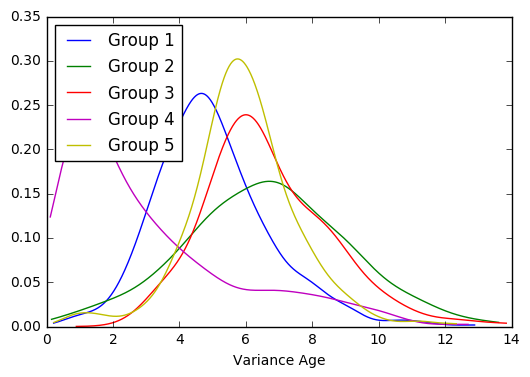

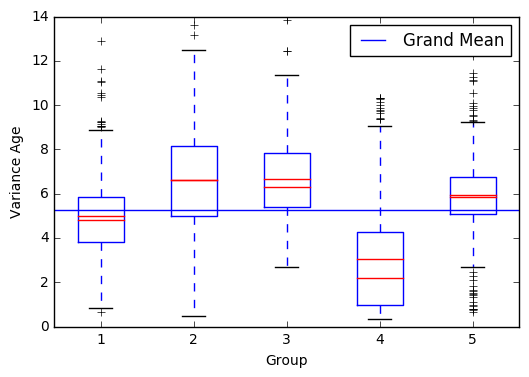

In [42]:
visualize(cols_arr[2],variance_age,"Variance Age")

### 6.  
Choose any two categories, and 

classify them by **logistical regression**, or 

you can try multi-class classification on all categories.

In [43]:
# choose category 1 and 2
cat1 = df[df[u'群类别'] == 1]
cat2 = df[df[u'群类别'] == 2]
X_df = cat1.append(cat2)

In [44]:
X1 = X_df.loc[0:len(X_df),u'群人数':u'图片比例'].as_matrix()
Y1 = X_df[u'群类别'].as_matrix()
Y1[Y1>1.5] = -1
Y_df = X_df[u'群类别']
X_df = X_df.loc[0:len(X_df),u'群人数':u'图片比例']

In [45]:
from sklearn import linear_model
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix

/home/snorkel-admin/App/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y1)

In [47]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)

In [48]:
scores=cross_val_score(classifier,X_train,y_train,cv=5)
print '准确率',np.mean(scores),scores

准确率 0.754984740528 [ 0.79831933  0.73728814  0.76068376  0.72649573  0.75213675]


精确率： 0.778245835579 [ 0.80769231  0.75308642  0.78666667  0.76        0.78378378]
召回率： 0.834585289515 [ 0.875       0.84722222  0.83098592  0.8028169   0.81690141]
综合指标评价 0.805285343361 [ 0.84        0.79738562  0.80821918  0.78082192  0.8       ]


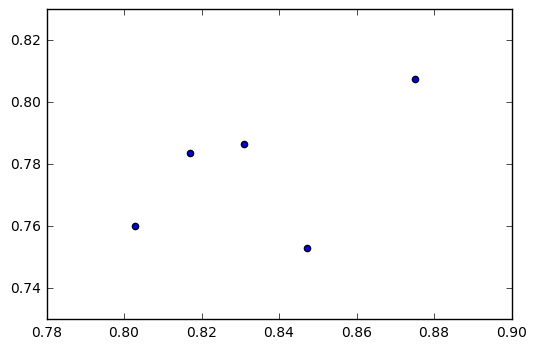

In [49]:
precision = cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
print u'精确率：', np.mean(precision), precision
recalls = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
print u'召回率：', np.mean(recalls), recalls
plt.scatter(recalls, precision)
fls=cross_val_score(classifier,X_train,y_train,cv=5,scoring='f1')
print "综合指标评价",np.mean(fls),fls

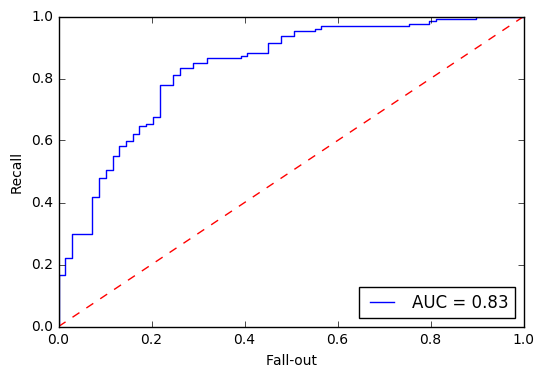

In [73]:
predictions_=classifier.predict_proba(X_test)#每一类的概率
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_[:,1])
roc_auc=auc(false_positive_rate,recall)
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,predictions)

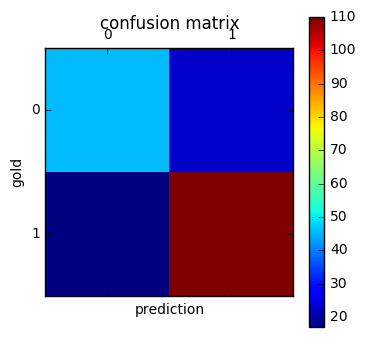

In [52]:
plt.matshow(confusion_matrix)
plt.title(u'confusion matrix')
plt.colorbar()
plt.ylabel(u'gold')
plt.xlabel(u'prediction')
plt.show()